In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation,Conv2D, Flatten, MaxPool2D, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras import Sequential

In [3]:
project_path='C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\'  
files =  os.listdir(project_path)
print(files)
train_path=os.path.join(project_path,os.listdir(project_path)[1])
valid_path=os.path.join(project_path,os.listdir(project_path)[2])
test_path=os.path.join(project_path,os.listdir(project_path)[0])

['Test', 'Train', 'Valid']


In [4]:
train_path, valid_path, test_path

('C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\Train',
 'C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\Valid',
 'C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\Test')

In [7]:
train_al_path  = train_path+'\\alert'
train_dr_path = train_path+'\\drowsy'

valid_al_path = valid_path+'\\alert'
valid_dr_path = valid_path+'\\drowsy'

test_al_path = test_path+'\\alert'
test_dr_path = test_path+'\\drowsy'

### FaceNet for Feature Extraction

In [6]:
from keras_facenet import FaceNet
embedder = FaceNet()

In [6]:
#obtaining the full path of imgs
oe_img_list = []

for img in os.listdir(train_al_path):
    img_path = os.path.join(train_al_path, img)
    oe_img_list.append(img_path)
print(len(oe_img_list))

print(oe_img_list[:3])
print()

ce_img_list = []

for img in os.listdir(train_dr_path):
    img_path = os.path.join(train_dr_path, img)
    ce_img_list.append(img_path)
print(len(ce_img_list))

print(ce_img_list[:3])

677
['C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\Train\\alert\\alert0.jpg', 'C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\Train\\alert\\alert1.jpg', 'C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\Train\\alert\\alert101.jpg']

398
['C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\Train\\drowsy\\drowsy1.jpg', 'C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\Train\\drowsy\\drowsy100.jpg', 'C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\Train\\drowsy\\drowsy101.jpg']


In [10]:
#Extracting the closed eye images for the train set
l_img_number = 1
r_img_number = 1

left_eye=[]
right_eye = []
for img in ce_img_list:
    try:
        detection = embedder.crop(img, threshold=0.95)
        left_eye = detection[0][0]['keypoints']['left_eye']
        right_eye = detection[0][0]['keypoints']['right_eye']   
        x1, y1 = left_eye
        m1, n1 = right_eye
        l_eyes = cv2.imread(img,1)[y1-50:y1+50, x1-60:x1+60]
        r_eyes = cv2.imread(img,1)[n1-50:n1+50, m1-60:m1+60]
        crop_left= cv2.imwrite('C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\cropped_features\\Train\\0_close\\l_eye'+str(l_img_number)+'.jpg', l_eyes)
        crop_right= cv2.imwrite('C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\cropped_features\\Train\\0_close\\r_eye'+str(r_img_number)+'.jpg', r_eyes)
        l_img_number+=1
        r_img_number+=1
    except:
        print(img.split("\\Train")[1], 'Eyes not detected')

\drowsy\drowsy126.jpg Eyes not detected
\drowsy\drowsy127.jpg Eyes not detected
\drowsy\drowsy129.jpg Eyes not detected
\drowsy\drowsy131.jpg Eyes not detected
\drowsy\drowsy132.jpg Eyes not detected
\drowsy\drowsy136.jpg Eyes not detected
\drowsy\drowsy139.jpg Eyes not detected
\drowsy\drowsy142.jpg Eyes not detected
\drowsy\drowsy145.jpg Eyes not detected
\drowsy\drowsy146.jpg Eyes not detected
\drowsy\drowsy148.jpg Eyes not detected
\drowsy\drowsy150.jpg Eyes not detected
\drowsy\drowsy152.jpg Eyes not detected
\drowsy\drowsy153.jpg Eyes not detected
\drowsy\drowsy154.jpg Eyes not detected
\drowsy\drowsy156.jpg Eyes not detected


In [8]:
#obtaining the full path of imgs
voe_img_list = []

for img in os.listdir(valid_al_path):
    img_path = os.path.join(valid_al_path, img)
    voe_img_list.append(img_path)
print(len(voe_img_list))

print(voe_img_list[:3])
print()

vce_img_list = []

for img in os.listdir(valid_dr_path):
    img_path = os.path.join(valid_dr_path, img)
    vce_img_list.append(img_path)
print(len(vce_img_list))

print(vce_img_list[:3])

193
['C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\Valid\\alert\\alert100.jpg', 'C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\Valid\\alert\\alert103.jpg', 'C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\Valid\\alert\\alert11.jpg']

193
['C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\Valid\\drowsy\\drowsy0.jpg', 'C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\Valid\\drowsy\\drowsy10.jpg', 'C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\Valid\\drowsy\\drowsy105.jpg']


In [12]:
#Extracting the closed eye images for the valid set
l_img_number = 1
r_img_number = 1

left_eye=[]
right_eye = []
for img in vce_img_list:
    try:
        detection = embedder.crop(img, threshold=0.95)
        left_eye = detection[0][0]['keypoints']['left_eye']
        right_eye = detection[0][0]['keypoints']['right_eye']   
        x1, y1 = left_eye
        m1, n1 = right_eye
        l_eyes = cv2.imread(img,1)[y1-50:y1+50, x1-60:x1+60]
        r_eyes = cv2.imread(img,1)[n1-50:n1+50, m1-60:m1+60]
        crop_left= cv2.imwrite('C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\cropped_features\\Valid\\0_close\\l_eye'+str(l_img_number)+'.jpg', l_eyes)
        crop_right= cv2.imwrite('C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\cropped_features\\valid\\0_close\\r_eye'+str(r_img_number)+'.jpg', r_eyes)
        l_img_number+=1
        r_img_number+=1
    except:
        print(img.split("\\Valid")[1], 'Eyes not detected')
        

\drowsy\drowsy125.jpg Eyes not detected
\drowsy\drowsy130.jpg Eyes not detected
\drowsy\drowsy133.jpg Eyes not detected
\drowsy\drowsy138.jpg Eyes not detected
\drowsy\drowsy141.jpg Eyes not detected
\drowsy\drowsy143.jpg Eyes not detected
\drowsy\drowsy151.jpg Eyes not detected
\drowsy\drowsy155.jpg Eyes not detected


In [8]:
#Extracting the open eye images for the train set
l_img_number = 1
r_img_number = 1

left_eye=[]
right_eye = []
for img in oe_img_list:
    try:
        detection = embedder.crop(img, threshold=0.95)
        left_eye = detection[0][0]['keypoints']['left_eye']
        right_eye = detection[0][0]['keypoints']['right_eye']   
        x1, y1 = left_eye
        m1, n1 = right_eye
        l_eyes = cv2.imread(img,1)[y1-50:y1+50, x1-60:x1+60]
        r_eyes = cv2.imread(img,1)[n1-50:n1+50, m1-60:m1+60]
        crop_left= cv2.imwrite('C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\cropped_features\\Train\\1_open\\l_eye'+str(l_img_number)+'.jpg', l_eyes)
        crop_right= cv2.imwrite('C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\cropped_features\\Train\\1_open\\r_eye'+str(r_img_number)+'.jpg', r_eyes)
        l_img_number+=1
        r_img_number+=1
    except:
        print(img.split("\\Train")[1], 'Eyes not detected')

In [13]:
#Extracting the open eye images for the valid set
l_img_number = 1
r_img_number = 1

left_eye=[]
right_eye = []
for img in voe_img_list:
    try:
        detection = embedder.crop(img, threshold=0.95)
        left_eye = detection[0][0]['keypoints']['left_eye']
        right_eye = detection[0][0]['keypoints']['right_eye']   
        x1, y1 = left_eye
        m1, n1 = right_eye
        l_eyes = cv2.imread(img,1)[y1-50:y1+50, x1-60:x1+60]
        r_eyes = cv2.imread(img,1)[n1-50:n1+50, m1-60:m1+60]
        crop_left= cv2.imwrite('C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\cropped_features\\Valid\\1_open\\l_eye'+str(l_img_number)+'.jpg', l_eyes)
        crop_right= cv2.imwrite('C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\cropped_features\\Valid\\1_open\\r_eye'+str(r_img_number)+'.jpg', r_eyes)
        l_img_number+=1
        r_img_number+=1
    except:
        print(img.split("\\Valid")[1], 'Eyes not detected')

In [11]:
#obtaining the full path of imgs
ny_img_list = []

for img in os.listdir(train_al_path):
    img_path = os.path.join(train_al_path, img)
    ny_img_list.append(img_path)
print(len(ny_img_list))

print(ny_img_list[:3])
print()

y_img_list = []

for img in os.listdir(train_dr_path):
    img_path = os.path.join(train_dr_path, img)
    y_img_list.append(img_path)
print(len(y_img_list))

print(y_img_list[:3])

677
['C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\Train\\alert\\alert0.jpg', 'C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\Train\\alert\\alert1.jpg', 'C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\Train\\alert\\alert101.jpg']

398
['C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\Train\\drowsy\\drowsy1.jpg', 'C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\Train\\drowsy\\drowsy100.jpg', 'C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\Train\\drowsy\\drowsy101.jpg']


In [16]:
#Extracting the closed mouth images   
img_number = 1


left_lip=[]
right_lip = []
for img in ny_img_list:                                         
    detection = embedder.crop(img, threshold=0.95)
    x1, y1 = detection[0][0]['keypoints']['mouth_left']
    x2, y2 = detection[0][0]['keypoints']['mouth_right']

    mouth = cv2.imread(img)[y1-70:y2+70, x1-20:x2+20]
    crop_mouth= cv2.imwrite('C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\cropped_features\\Train\\2_no_yawn\\mouth'+str(img_number)+'.jpg', mouth)
    img_number+=1


In [1]:
#Extracting the yawning images   
img_number = 1


left_lip=[]
right_lip = []
for img in ny_img_list:                                         
    detection = embedder.crop(img, threshold=0.95)
    x1, y1 = detection[0][0]['keypoints']['mouth_left']
    x2, y2 = detection[0][0]['keypoints']['mouth_right']

    mouth = cv2.imread(img)[y1-100:y2+100, x1-20:x2+20]
    crop_mouth= cv2.imwrite('C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\cropped_features\\Train\\3_yawn\\mouth'+str(img_number)+'.jpg', mouth)
    img_number+=1


In [14]:
#obtaining the full path of imgs
vny_img_list = []

for img in os.listdir(valid_al_path):
    img_path = os.path.join(valid_al_path, img)
    vny_img_list.append(img_path)
print(len(vny_img_list))

print(vny_img_list[:3])
print()

vy_img_list = []

for img in os.listdir(valid_dr_path):
    img_path = os.path.join(valid_dr_path, img)
    vy_img_list.append(img_path)
print(len(vy_img_list))

print(vy_img_list[:3])

193
['C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\Valid\\alert\\alert100.jpg', 'C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\Valid\\alert\\alert103.jpg', 'C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\Valid\\alert\\alert11.jpg']

193
['C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\Valid\\drowsy\\drowsy0.jpg', 'C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\Valid\\drowsy\\drowsy10.jpg', 'C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\Valid\\drowsy\\drowsy105.jpg']


In [15]:
#Extracting the closed mouth images   
img_number = 1


left_lip=[]
right_lip = []
for img in vny_img_list:                                         
    detection = embedder.crop(img, threshold=0.95)
    x1, y1 = detection[0][0]['keypoints']['mouth_left']
    x2, y2 = detection[0][0]['keypoints']['mouth_right']

    mouth = cv2.imread(img)[y1-70:y2+70, x1-20:x2+20]
    crop_mouth= cv2.imwrite('C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\cropped_features\\Valid\\2_no_yawn\\mouth'+str(img_number)+'.jpg', mouth)
    img_number+=1


In [16]:
#Extracting the yawning images   
img_number = 1


left_lip=[]
right_lip = []
for img in vy_img_list:                                         
    detection = embedder.crop(img, threshold=0.95)
    x1, y1 = detection[0][0]['keypoints']['mouth_left']
    x2, y2 = detection[0][0]['keypoints']['mouth_right']

    mouth = cv2.imread(img)[y1-100:y2+100, x1-20:x2+20]
    crop_mouth= cv2.imwrite('C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\cropped_features\\Valid\\3_yawn\\mouth'+str(img_number)+'.jpg', mouth)
    img_number+=1


In [17]:
#obtaining the full path of imgs
toe_img_list = []

for img in os.listdir(test_al_path):
    img_path = os.path.join(test_al_path, img)
    toe_img_list.append(img_path)
print(len(toe_img_list))

print(toe_img_list[:3])
print()

tce_img_list = []

for img in os.listdir(test_dr_path):
    img_path = os.path.join(test_dr_path, img)
    tce_img_list.append(img_path)
print(len(tce_img_list))

print(tce_img_list[:3])

96
['C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\Test\\alert\\alert10.jpg', 'C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\Test\\alert\\alert104.jpg', 'C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\Test\\alert\\alert115.jpg']

96
['C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\Test\\drowsy\\drowsy106.jpg', 'C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\Test\\drowsy\\drowsy117.jpg', 'C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\Test\\drowsy\\drowsy123.jpg']


In [18]:
#Extracting the closed eye images for the test set
l_img_number = 1
r_img_number = 1

left_eye=[]
right_eye = []
for img in tce_img_list:
    try:
        detection = embedder.crop(img, threshold=0.95)
        left_eye = detection[0][0]['keypoints']['left_eye']
        right_eye = detection[0][0]['keypoints']['right_eye']   
        x1, y1 = left_eye
        m1, n1 = right_eye
        l_eyes = cv2.imread(img,1)[y1-50:y1+50, x1-60:x1+60]
        r_eyes = cv2.imread(img,1)[n1-50:n1+50, m1-60:m1+60]
        crop_left= cv2.imwrite('C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\cropped_features\\Test\\0_close\\l_eye'+str(l_img_number)+'.jpg', l_eyes)
        crop_right= cv2.imwrite('C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\cropped_features\\Test\\0_close\\r_eye'+str(r_img_number)+'.jpg', r_eyes)
        l_img_number+=1
        r_img_number+=1
    except:
        print(img.split("\\Test")[1], 'Eyes not detected')

\drowsy\drowsy128.jpg Eyes not detected
\drowsy\drowsy135.jpg Eyes not detected
\drowsy\drowsy137.jpg Eyes not detected
\drowsy\drowsy147.jpg Eyes not detected
\drowsy\drowsy149.jpg Eyes not detected


In [19]:
#Extracting the open eye images for the test set
l_img_number = 1
r_img_number = 1

left_eye=[]
right_eye = []
for img in toe_img_list:
    try:
        detection = embedder.crop(img, threshold=0.95)
        left_eye = detection[0][0]['keypoints']['left_eye']
        right_eye = detection[0][0]['keypoints']['right_eye']   
        x1, y1 = left_eye
        m1, n1 = right_eye
        l_eyes = cv2.imread(img,1)[y1-50:y1+50, x1-60:x1+60]
        r_eyes = cv2.imread(img,1)[n1-50:n1+50, m1-60:m1+60]
        crop_left= cv2.imwrite('C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\cropped_features\\Test\\1_open\\l_eye'+str(l_img_number)+'.jpg', l_eyes)
        crop_right= cv2.imwrite('C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\cropped_features\\Test\\1_open\\r_eye'+str(r_img_number)+'.jpg', r_eyes)
        l_img_number+=1
        r_img_number+=1
    except:
        print(img.split("\\Test")[1], 'Eyes not detected')

In [20]:
#obtaining the full path of imgs
tny_img_list = []

for img in os.listdir(test_al_path):
    img_path = os.path.join(test_al_path, img)
    tny_img_list.append(img_path)
print(len(tny_img_list))

print(tny_img_list[:3])
print()

ty_img_list = []

for img in os.listdir(test_dr_path):
    img_path = os.path.join(test_dr_path, img)
    ty_img_list.append(img_path)
print(len(ty_img_list))

print(ty_img_list[:3])

96
['C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\Test\\alert\\alert10.jpg', 'C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\Test\\alert\\alert104.jpg', 'C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\Test\\alert\\alert115.jpg']

96
['C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\Test\\drowsy\\drowsy106.jpg', 'C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\Test\\drowsy\\drowsy117.jpg', 'C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\Test\\drowsy\\drowsy123.jpg']


In [21]:
#Extracting the closed mouth images   
img_number = 1


left_lip=[]
right_lip = []
for img in tny_img_list:                                         
    detection = embedder.crop(img, threshold=0.95)
    x1, y1 = detection[0][0]['keypoints']['mouth_left']
    x2, y2 = detection[0][0]['keypoints']['mouth_right']

    mouth = cv2.imread(img)[y1-70:y2+70, x1-20:x2+20]
    crop_mouth= cv2.imwrite('C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\cropped_features\\Test\\2_no_yawn\\mouth'+str(img_number)+'.jpg', mouth)
    img_number+=1


In [22]:
#Extracting the yawning images   
img_number = 1


left_lip=[]
right_lip = []
for img in ty_img_list:                                         
    detection = embedder.crop(img, threshold=0.95)
    x1, y1 = detection[0][0]['keypoints']['mouth_left']
    x2, y2 = detection[0][0]['keypoints']['mouth_right']

    mouth = cv2.imread(img)[y1-100:y2+100, x1-20:x2+20]
    crop_mouth= cv2.imwrite('C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\cropped_features\\Test\\3_yawn\\mouth'+str(img_number)+'.jpg', mouth)
    img_number+=1


In [48]:
def plot_confusion_matrix(cm, classes,
                         normalise=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    if normalise:
        cm=cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print('Normalised Confusion Matrix')
    else:
        print('Confusion Matrix without normalisation')
    
    print(cm)
    
    thresh=cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, cm[i,j], color='white' if cm[i][j] > thresh else 'black')
        
class_labels=['0_close', '1_open', '2_no_yawn', '3_yawn']

In [49]:
def plot_history(hist):
    plt.figure(figsize=(20,10))
    fig, axs = plt.subplots(2)
    # accuracy subplot
    axs[0].plot(hist.history["accuracy"], label="train accuracy")
    axs[0].plot(hist.history["val_accuracy"], label="test accuracy")    
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # Error subplot
    axs[1].plot(hist.history["loss"], label="train error")
    axs[1].plot(hist.history["val_loss"], label="test error")    
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    
    plt.show()

### Model Implementation

In [23]:
f_train = 'C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\cropped_features\\Train\\'
f_valid = 'C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\cropped_features\\Valid\\'
f_test = 'C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\cropped_features\\Test\\'

In [56]:
cnn_train_set=ImageDataGenerator().flow_from_directory(directory = f_train, target_size=(224,224), batch_size=10)

cnn_valid_set =ImageDataGenerator().flow_from_directory(directory = f_valid, target_size=(224,224), batch_size=10)

cnn_test_set =ImageDataGenerator().flow_from_directory(directory = f_test, target_size=(224,224), batch_size=10)

Found 3554 images belonging to 4 classes.
Found 1019 images belonging to 4 classes.
Found 520 images belonging to 4 classes.


In [109]:
cnn2_model = Sequential()
cnn2_model.add(Conv2D(64, (3, 3), activation = "relu", input_shape = (224,224,3)))
cnn2_model.add(MaxPool2D((3, 3), strides=(2, 2), padding="same"))
cnn2_model.add(BatchNormalization())

cnn2_model.add(Conv2D(32, (3, 3), activation = "relu"))
cnn2_model.add(MaxPool2D((3, 3), strides=(2, 2), padding="same"))
cnn2_model.add(Dropout(0.3))

cnn2_model.add(Conv2D(32, (2, 2), activation = "relu"))
cnn2_model.add(MaxPool2D((2, 2), strides=(2, 2), padding="same"))
cnn2_model.add(BatchNormalization())

cnn2_model.add(Conv2D(16, (1, 1), activation = "relu"))
cnn2_model.add(MaxPool2D((1, 1), strides=(2, 2), padding="same"))
cnn2_model.add(BatchNormalization())

cnn2_model.add(Flatten())
cnn2_model.add(Dense(64, activation="relu"))
cnn2_model.add(Dropout(0.3))
cnn2_model.add(Dense(4, activation="softmax"))

cnn2_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 111, 111, 64)      0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 111, 111, 64)      256       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 109, 109, 32)      18464     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 55, 55, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 54, 54, 32)       

In [110]:
cnn2_model.compile(Adam(lr=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', patience=2, verbose=1),
    tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, verbose=1, restore_best_weights=True),
]

In [111]:
cnn_hist=cnn2_model.fit(cnn_train_set, steps_per_epoch=10, validation_data=cnn_valid_set, validation_steps=10, epochs=50, verbose=2)

Epoch 1/50
10/10 - 7s - loss: 1.7589 - accuracy: 0.4200 - val_loss: 1.9923 - val_accuracy: 0.3500
Epoch 2/50
10/10 - 7s - loss: 1.4921 - accuracy: 0.4000 - val_loss: 1.7188 - val_accuracy: 0.2600
Epoch 3/50
10/10 - 7s - loss: 1.0191 - accuracy: 0.5300 - val_loss: 1.2870 - val_accuracy: 0.5300
Epoch 4/50
10/10 - 7s - loss: 0.9515 - accuracy: 0.6100 - val_loss: 1.4733 - val_accuracy: 0.4100
Epoch 5/50
10/10 - 8s - loss: 0.7124 - accuracy: 0.7400 - val_loss: 1.3979 - val_accuracy: 0.4000
Epoch 6/50
10/10 - 8s - loss: 0.6881 - accuracy: 0.7200 - val_loss: 1.2878 - val_accuracy: 0.5300
Epoch 7/50
10/10 - 8s - loss: 0.5504 - accuracy: 0.7600 - val_loss: 0.8358 - val_accuracy: 0.7300
Epoch 8/50
10/10 - 9s - loss: 0.5820 - accuracy: 0.7800 - val_loss: 0.8051 - val_accuracy: 0.7400
Epoch 9/50
10/10 - 8s - loss: 0.4532 - accuracy: 0.8400 - val_loss: 0.7558 - val_accuracy: 0.7300
Epoch 10/50
10/10 - 8s - loss: 0.3862 - accuracy: 0.8100 - val_loss: 0.5103 - val_accuracy: 0.8900
Epoch 11/50
10/10 -

<Figure size 1440x720 with 0 Axes>

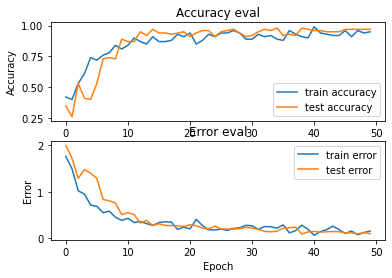

In [112]:
plot_history(cnn_hist)

In [113]:
cnn2_model.save('C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First Approach\\Saved_models/cnn2_model2')


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\hp\Documents\Data Science\SEM 3\Major Project\Drowsiness detection files\First Approach\Saved_models/cnn2_model2\assets


<Figure size 1440x720 with 0 Axes>

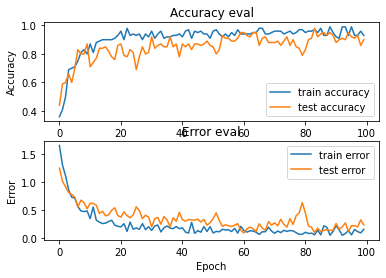

In [73]:
plot_history(cnn_hist)                                                # saved model - loaded

In [75]:
cnn_test_set.class_indices
test_labels= cnn_test_set.classes

In [88]:
predictions = cnn2_model.predict(x=cnn_test_set, verbose=0)
y_classes=predictions.argmax(axis=-1)

In [91]:
for i in range(len(predictions)):
    print(predictions[i], y_classes[i])
    print()

[1.6368480e-03 9.9686533e-01 1.4372283e-03 6.0596682e-05] 1

[9.9683505e-01 2.3724486e-03 7.8574213e-04 6.7170213e-06] 0

[9.9839503e-01 1.3402643e-03 2.5550989e-04 9.2236578e-06] 0

[9.7384608e-01 2.5930014e-02 1.6907071e-04 5.4939766e-05] 0

[1.2600787e-02 5.7866459e-04 9.8681796e-01 2.6463701e-06] 2

[4.3749001e-02 9.5528722e-01 9.4614201e-04 1.7601906e-05] 1

[6.7827269e-04 3.2170772e-04 9.9894315e-01 5.6901230e-05] 2

[1.3315725e-02 9.8484093e-01 1.7770120e-03 6.6367676e-05] 1

[9.9404812e-01 5.5353655e-03 4.1317003e-04 3.3702340e-06] 0

[9.97530758e-01 2.36117188e-03 1.06227904e-04 1.92611969e-06] 0

[0.8702865  0.12479116 0.00369275 0.0012296 ] 0

[9.9900240e-01 7.1264320e-04 2.3763248e-04 4.7398036e-05] 0

[9.9203390e-01 7.8941351e-03 5.9924507e-05 1.1938985e-05] 0

[9.90671635e-01 9.07200668e-03 1.10908055e-04 1.45473125e-04] 0

[9.9593663e-01 3.0062965e-03 1.0538651e-03 3.1260997e-06] 0

[9.9638784e-01 2.9558884e-03 5.8748404e-04 6.8784757e-05] 0

[4.7506429e-03 4.9640826e-04

Confusion Matrix without normalisation
[[79 34 35 12]
 [85 68 40 21]
 [39 31 17  9]
 [26 11  5  8]]


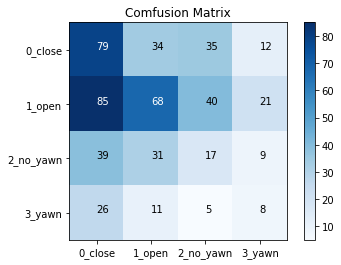

In [92]:
cm= confusion_matrix(y_true=test_labels, y_pred= predictions.argmax(axis=1))
plot_confusion_matrix(cm, classes=class_labels, title='Comfusion Matrix')

Please enter the test image with full path: C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\Test\\alert\\alert_1_32.jpg
[[3.7568975e-07 1.4118014e-01 4.8088041e-04 8.5833865e-01]]


'alert'

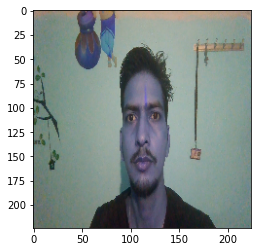

In [8]:
#  C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First dataset\\Test\\alert\\alert154.jpg

test_img = input('Please enter the test image with full path: ')


def drowsiness_class(output):
    if output == 0 or output == 2:
            return 'alert'
    else:
        output == 1 or output == 3
        return 'drowsy'

def decode_prediction():
#     from PIL import Image
#     test_image = Image.open(input('Please enter the test image with full path: '))
#     test_image.show

    test_image = cv2.resize(cv2.imread(test_img), (224,224))
    plt.imshow(test_image)
    test_image =np.array(test_image).reshape(-1, 224,224,3)
    prediction = cnn2_model.predict({'input':test_image})
    print(prediction)
    
    eye_pred = prediction[:2]
    yawn_pred = prediction[2:]
    
    output_prob1 = np.max(eye_pred)
    eye_out=output_prob1.argmax(axis=-1)
    output=drowsiness_class(eye_out)
    return output

    output_prob2 = np.max(yawn_pred)
    yawn_out=output_prob2.argmax(axis=-1)
    output=drowsiness_class(yawn_out)
    return output

decode_prediction()

In [4]:
cnn2_model=tf.keras.models.load_model('C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Drowsiness detection files\\First Approach\\Saved_models/cnn2_model2')
cnn2_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 111, 111, 64)      0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 111, 111, 64)      256       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 109, 109, 32)      18464     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 55, 55, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 54, 54, 32)       